In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
def degreedist(G: nx.Graph, logs=False):
    degrees = dict(G.degree()).values()
    plt.hist(degrees, bins=30, log=logs, edgecolor="black")
    plt.xlabel("Degree of nodes")
    plt.ylabel("Number of nodes")
    if logs:
        plt.xscale('log')
    plt.show()

In [98]:
def edge_weight_distribution(G: nx.Graph):
    edges = [j for (_, j) in dict(G.edges()).items()]
    edges = [j['weight'] for j in edges]
    plt.hist(edges, bins=30, edgecolor='black')
    plt.xlabel("Weight of edges")
    plt.ylabel("Number of edges")
    plt.show()

# Data processed with customers as nodes and shared items as edges

In [3]:
dataset = pd.read_csv('./processed_customer_grocery_dataset.csv')

In [4]:
G: nx.Graph = nx.from_pandas_edgelist(dataset, 'source', 'dest', 'weight')

In [5]:
print(len(G.nodes))
print(len(G.edges))

3898
5397795


In [61]:
pos = nx.spring_layout(G, weight='weight')

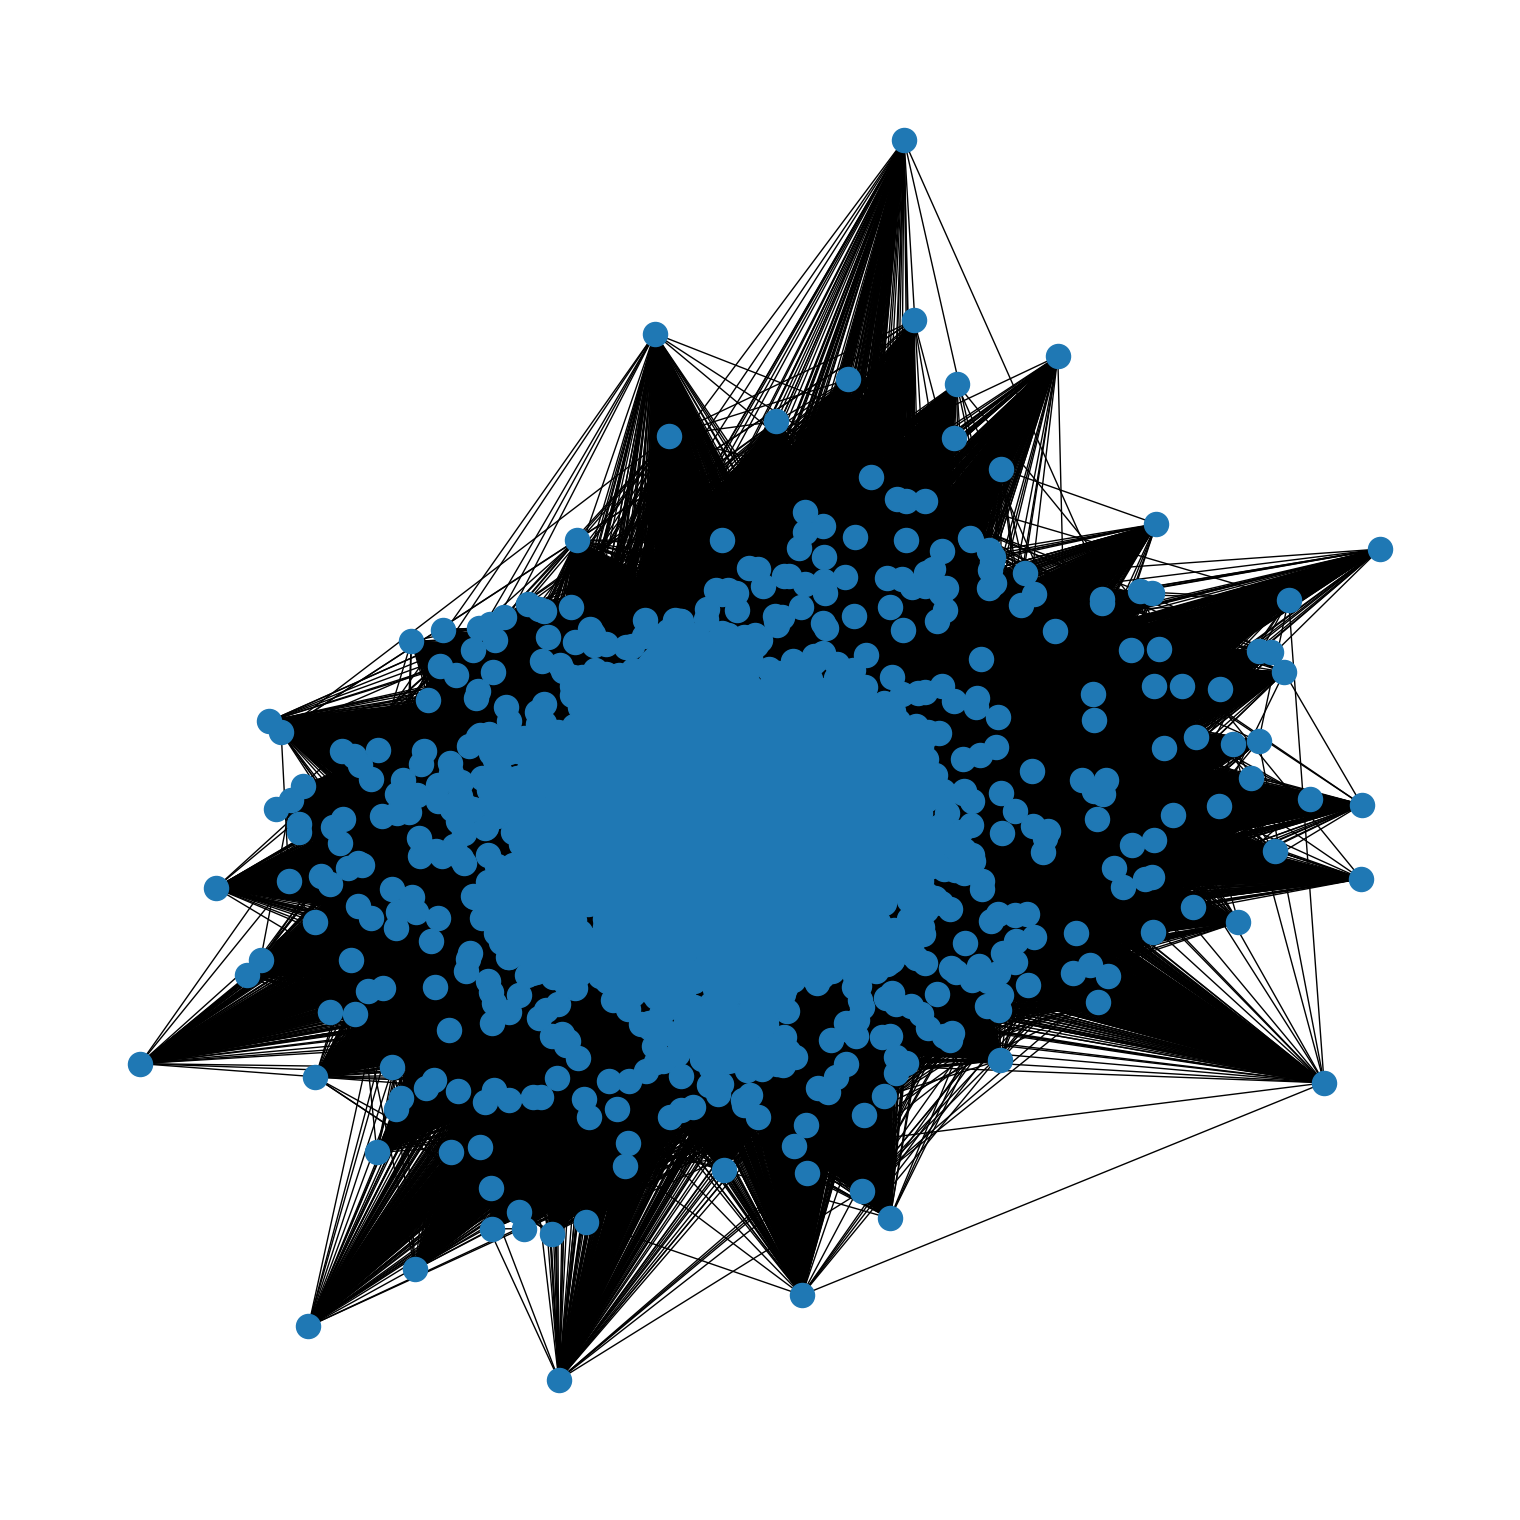

In [62]:
plt.figure(figsize=(15, 15))
nx.draw(G, pos)

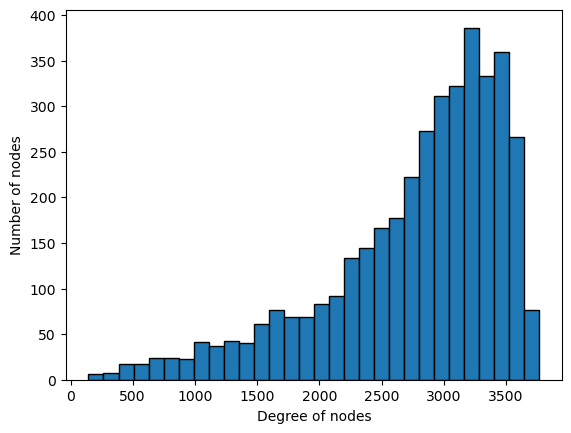

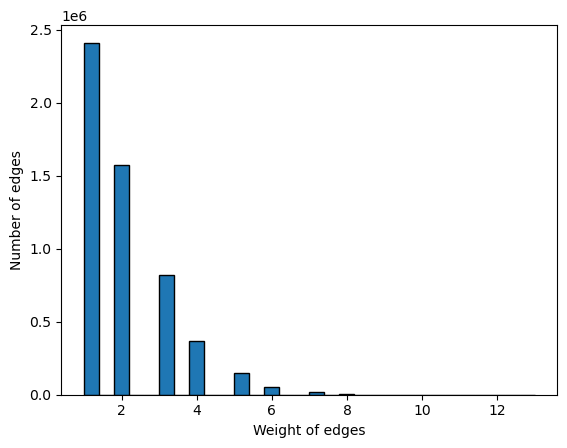

In [102]:
degreedist(G)
edge_weight_distribution(G)

In [19]:
communities = nx.community.greedy_modularity_communities(G, 'weight')

In [20]:
print(len(communities))
print(nx.community.modularity(G, communities))

3
0.04229704600878459


In [7]:
closeness_G = nx.closeness_centrality(G, distance='weigth', )

KeyboardInterrupt: 

In [ ]:
betweenness_G = nx.betweenness_centrality(G, weight='weight', )

In [8]:
connectivity_G = nx.average_degree_connectivity(G, weight="weight")

In [16]:
print(sorted(connectivity_G.items(), key= lambda x: x[1], reverse=True)[0:3])

[(1785, 3184.0700280112046), (1881, 3170.0566700100303), (1906, 3165.7339673250426)]


In [18]:
nx.diameter(G)

2

In [17]:
transitivity_G = nx.transitivity(G)

KeyboardInterrupt: 

In [23]:
plt.figure(figsize=(15, 15))
nx.draw(G, pos)
nx.draw_networkx_nodes(G, pos, nodelist=communities[0], node_color='b')
nx.draw_networkx_nodes(G, pos, nodelist=communities[1], node_color='r')
nx.draw_networkx_nodes(G, pos, nodelist=communities[2], node_color='g')

NameError: name 'pos' is not defined

<Figure size 1500x1500 with 0 Axes>

In [103]:
nx.density(G)

0.7106800787281213

# Data processed with items as nodes and the shared customer as edges

In [35]:
item_dataset = pd.read_csv('./processed_item_grocery_dataset.csv')

In [36]:
G_i: nx.Graph = nx.from_pandas_edgelist(item_dataset, 'source', 'dest', 'weight')

In [37]:
print(len(G_i.nodes))
print(len(G_i.edges))

167
9824


In [43]:
pos_gi = nx.spring_layout(G_i, weight='weight')

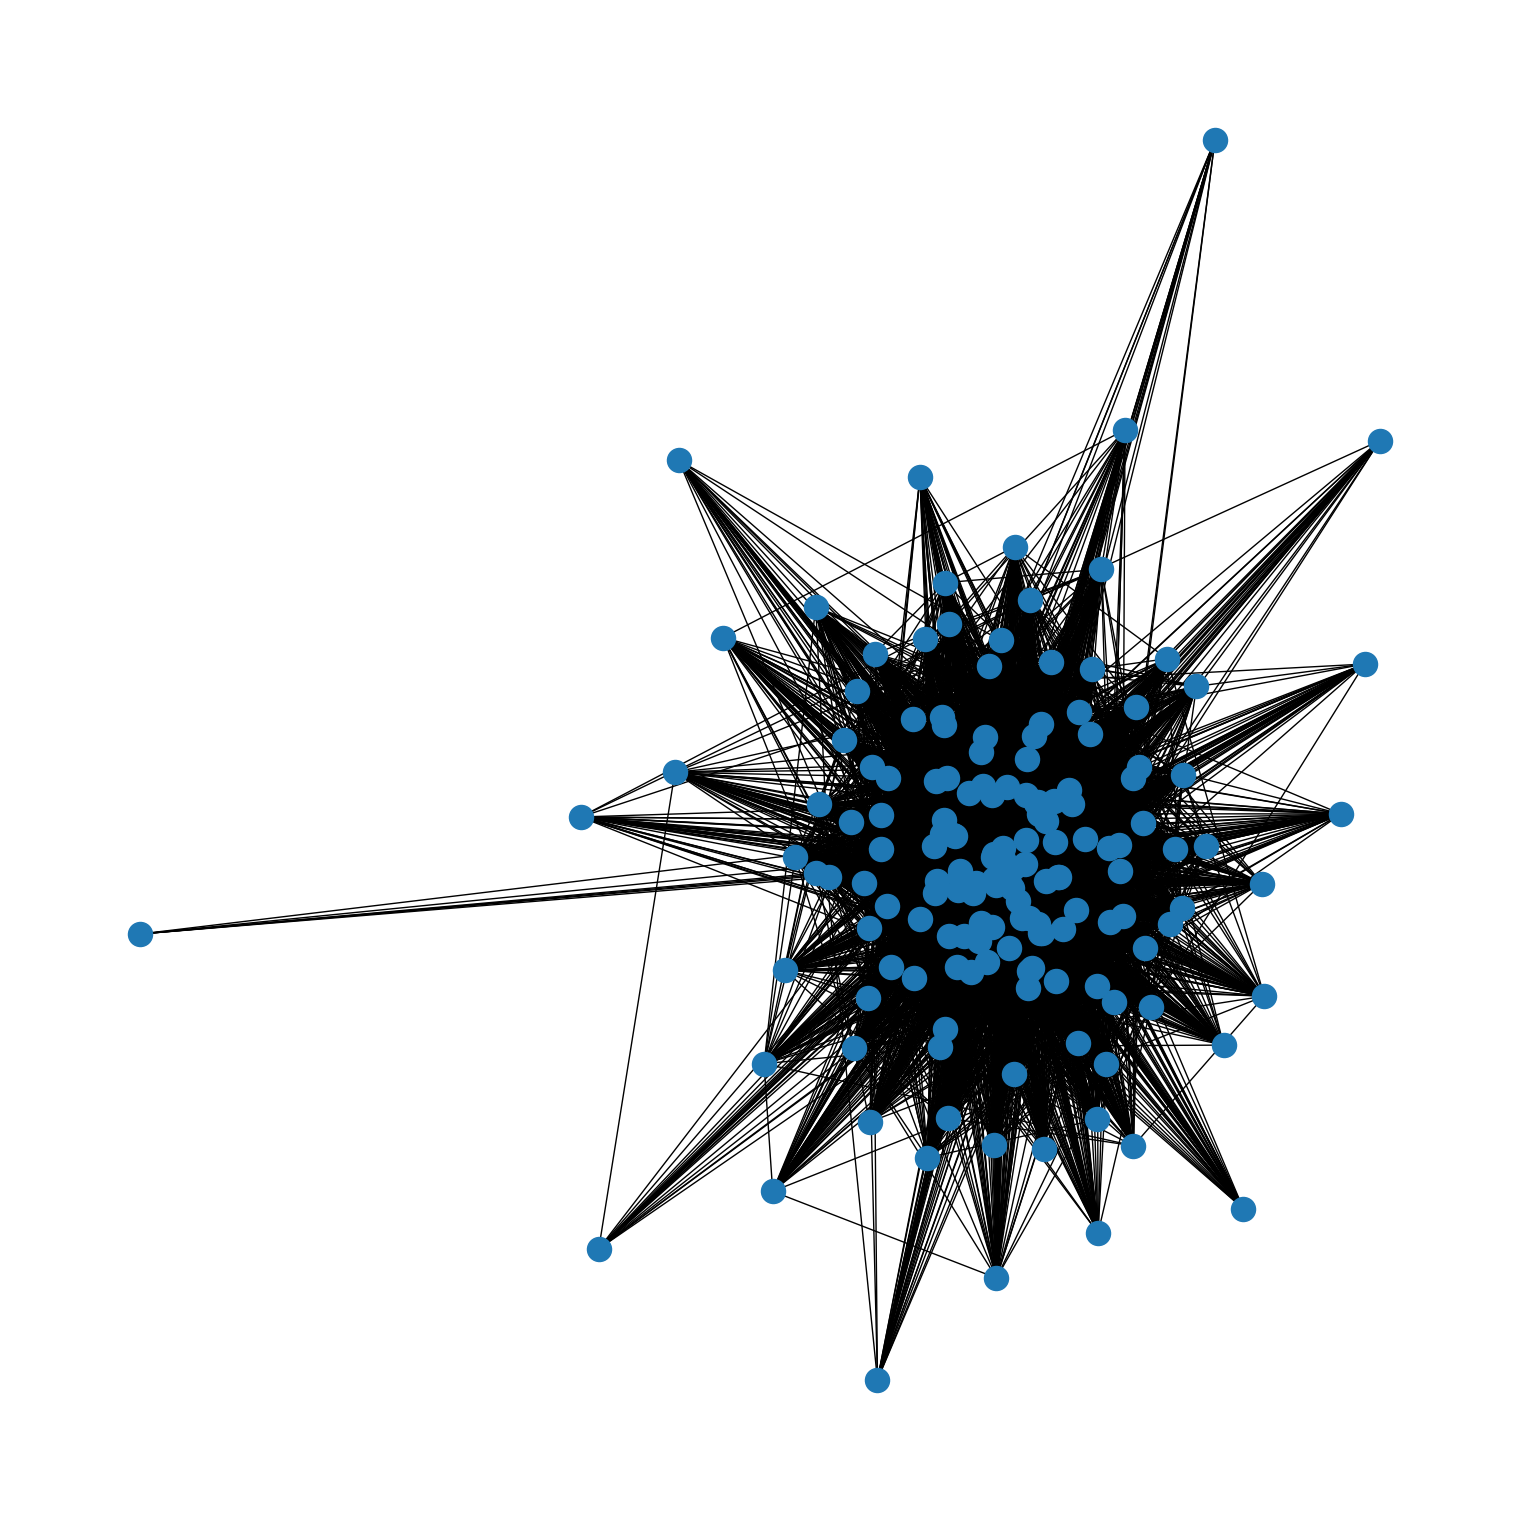

In [44]:
plt.figure(figsize=(15, 15))
nx.draw(G_i, pos=pos_gi)

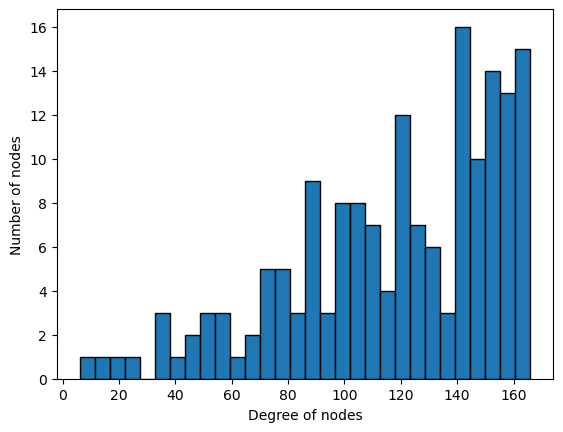

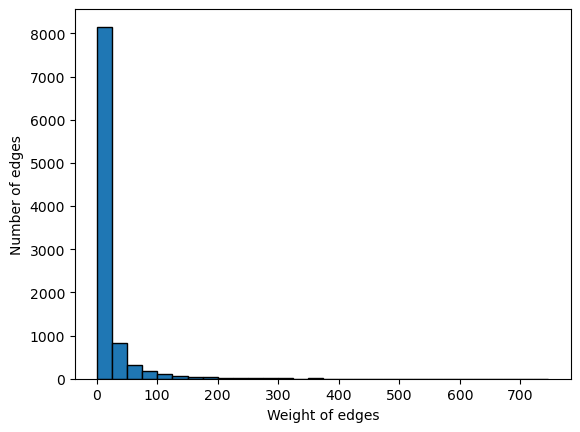

In [101]:
degreedist(G_i)
edge_weight_distribution(G_i)

In [47]:
communities_i = nx.community.greedy_modularity_communities(G_i, 'weight')

In [48]:
print(len(communities_i))
print(nx.community.modularity(G_i, communities_i))

3
0.004117720689952605


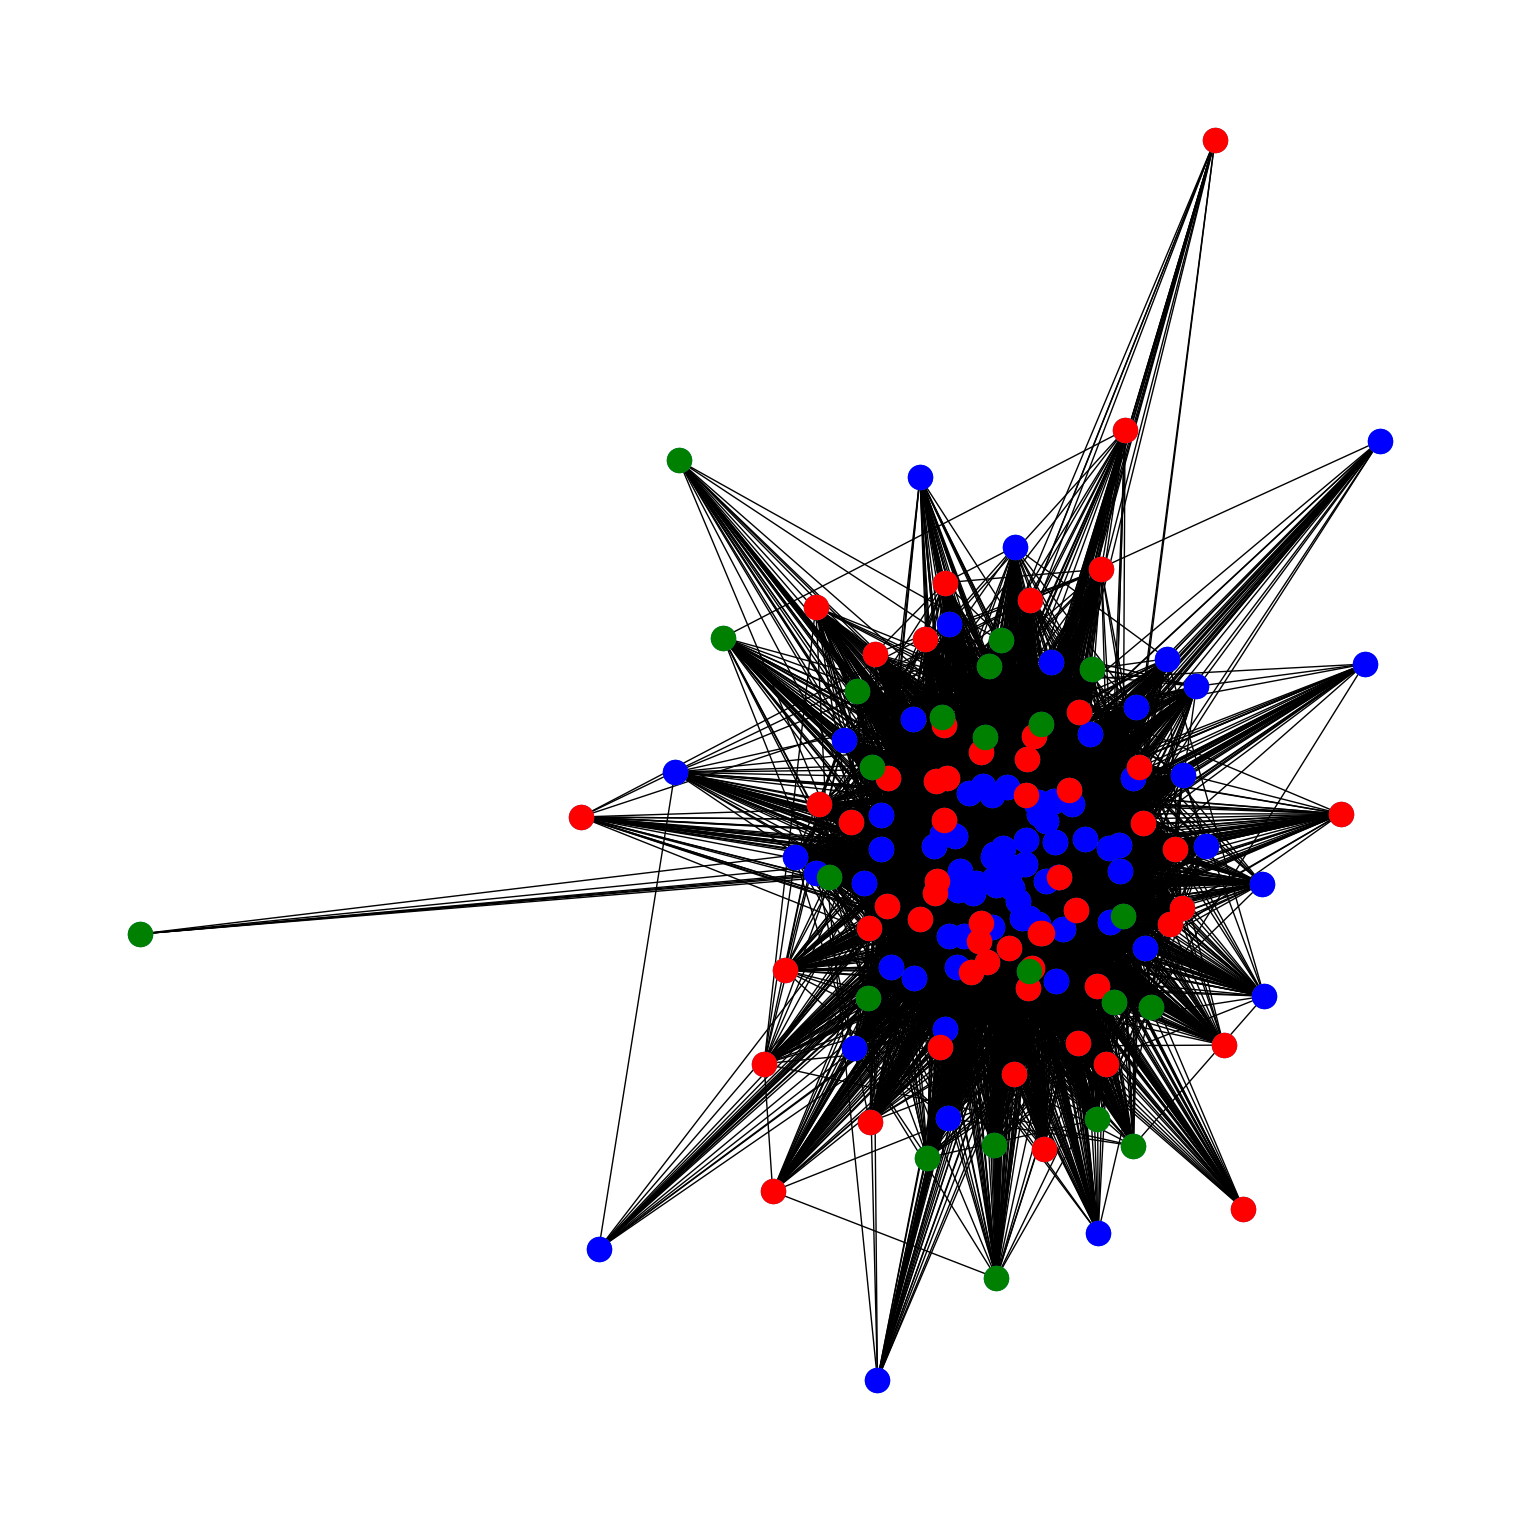

In [45]:
plt.figure(figsize=(15, 15))
nx.draw(G_i, pos_gi)
nx.draw_networkx_nodes(G_i, pos_gi, nodelist=communities_i[0], node_color='b')
nx.draw_networkx_nodes(G_i, pos_gi, nodelist=communities_i[1], node_color='r')
nx.draw_networkx_nodes(G_i, pos_gi, nodelist=communities_i[2], node_color='g')


In [74]:
transitivity_ig = nx.transitivity(G_i)

In [76]:
print(transitivity_ig)

0.825211411975741


In [78]:
clustering_ig = nx.clustering(G_i, weight='weight')

In [79]:
print(sorted(clustering_ig.items(), key= lambda x: x[1], reverse=True)[0:3])

[('whole milk', 0.04845204426034115), ('other vegetables', 0.04123825479914658), ('rolls/buns', 0.03937170392069353)]


In [104]:
nx.density(G_i)

0.708751172354087

# Nodes are item and edge if items were bought on same day

In [49]:
data_item_dataset = pd.read_csv('./processed_data_items_grocery_dataset.csv')

In [50]:
data_item_graph = nx.from_pandas_edgelist(data_item_dataset, 'source', 'dest', 'weight')

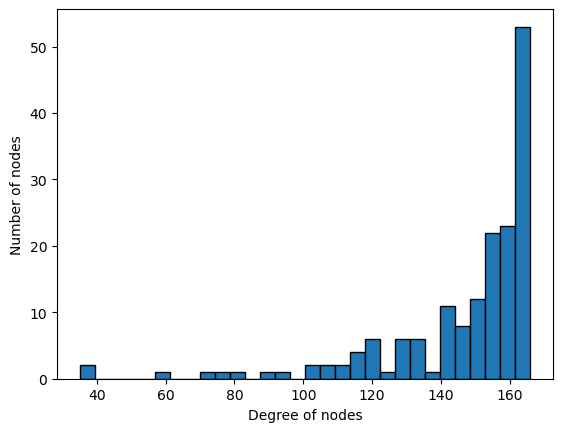

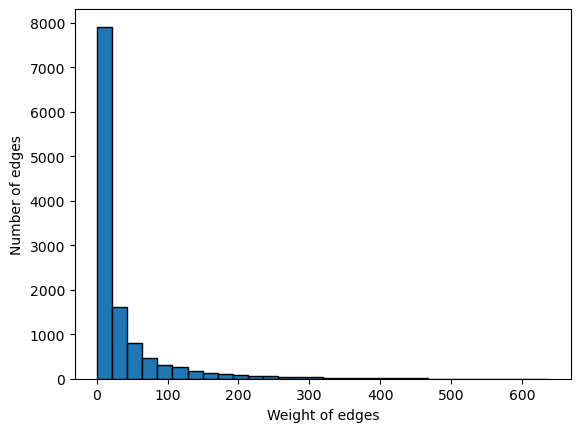

In [100]:
degreedist(data_item_graph)
edge_weight_distribution(data_item_graph)

In [52]:
pos_di = nx.spring_layout(data_item_graph, weight='weight')

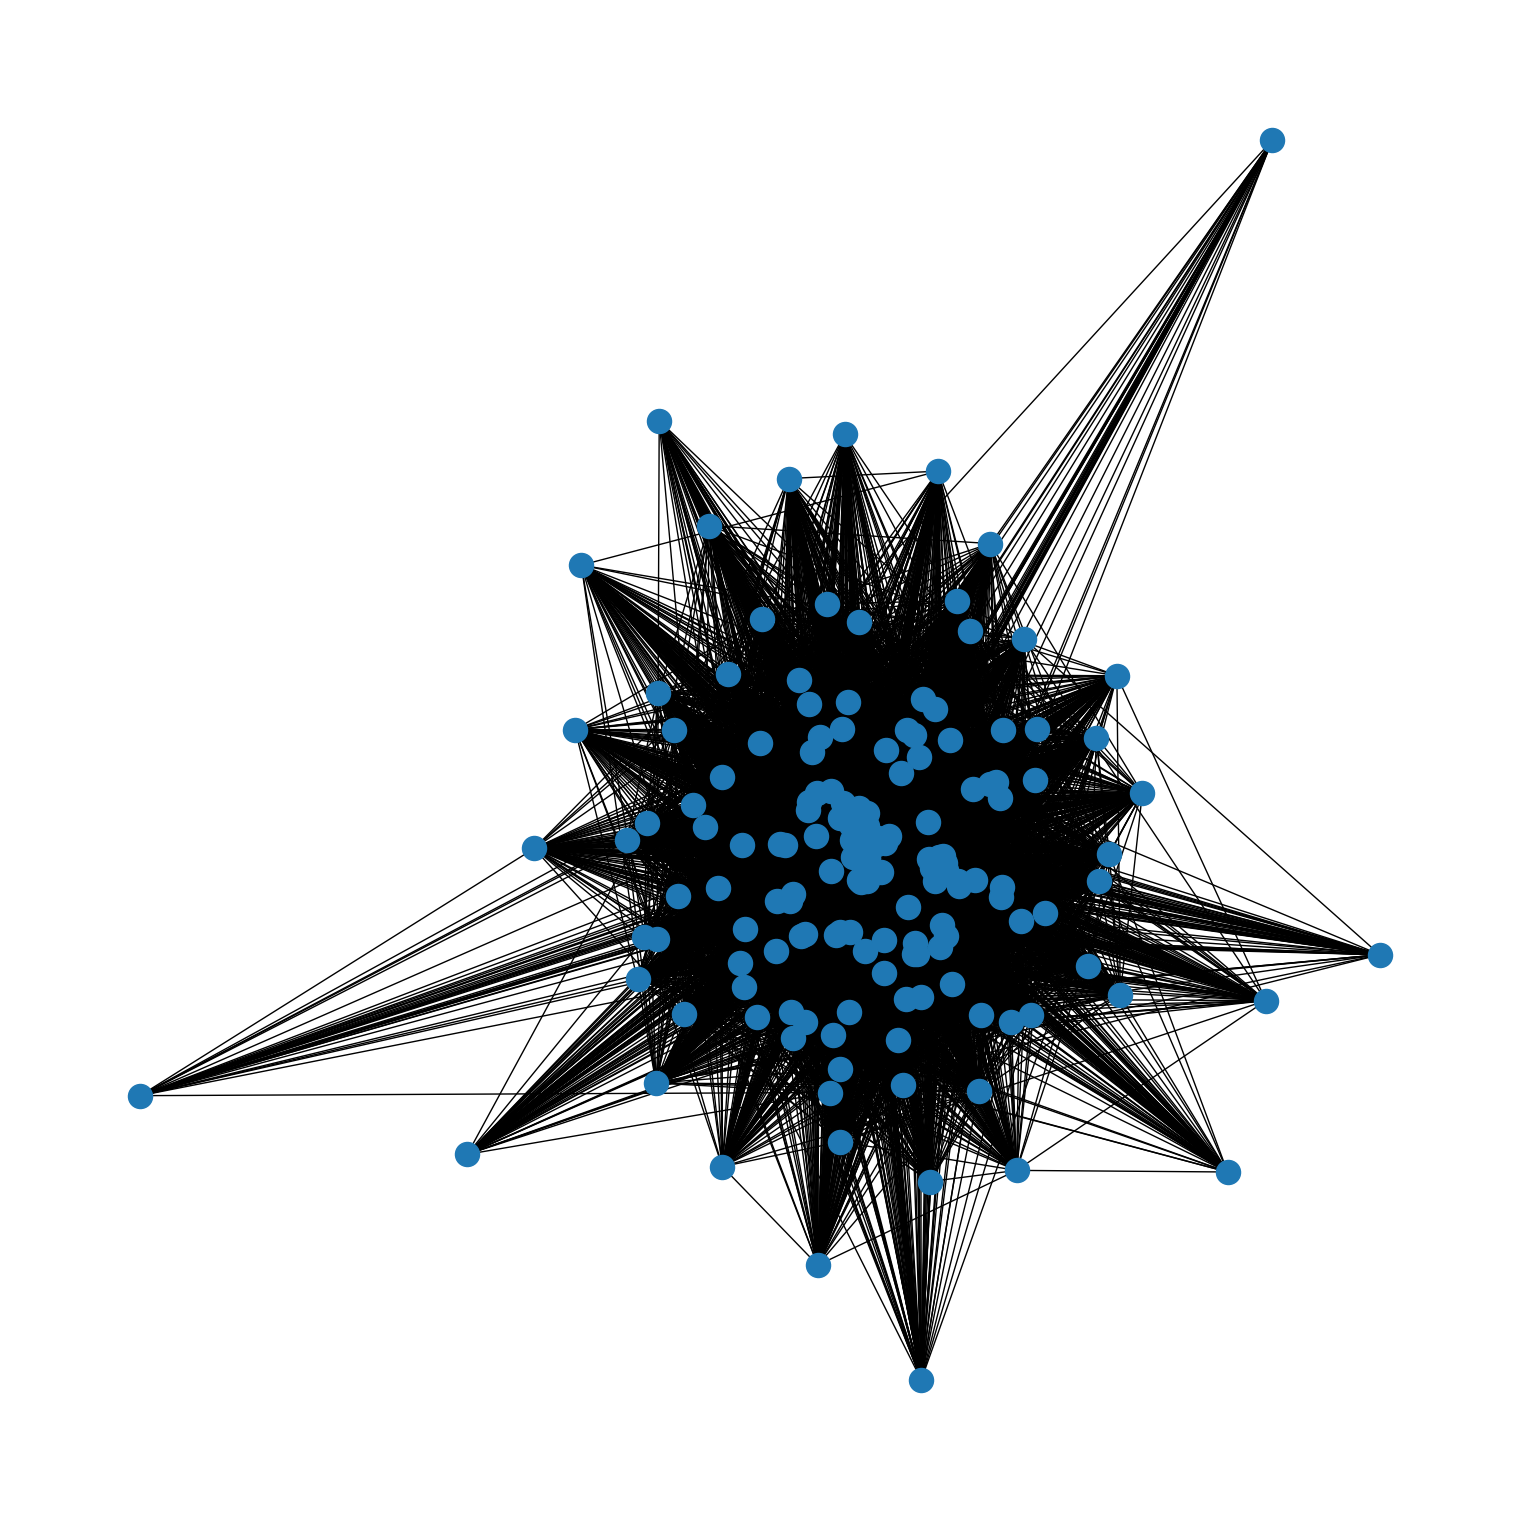

In [57]:
plt.figure(figsize=(15, 15))
nx.draw(data_item_graph, pos=pos_di)

In [54]:
date_item_communities = nx.community.greedy_modularity_communities(data_item_graph)

In [55]:
print(len(date_item_communities))
print(nx.community.modularity(data_item_graph, date_item_communities))

2
-0.003021805835594374


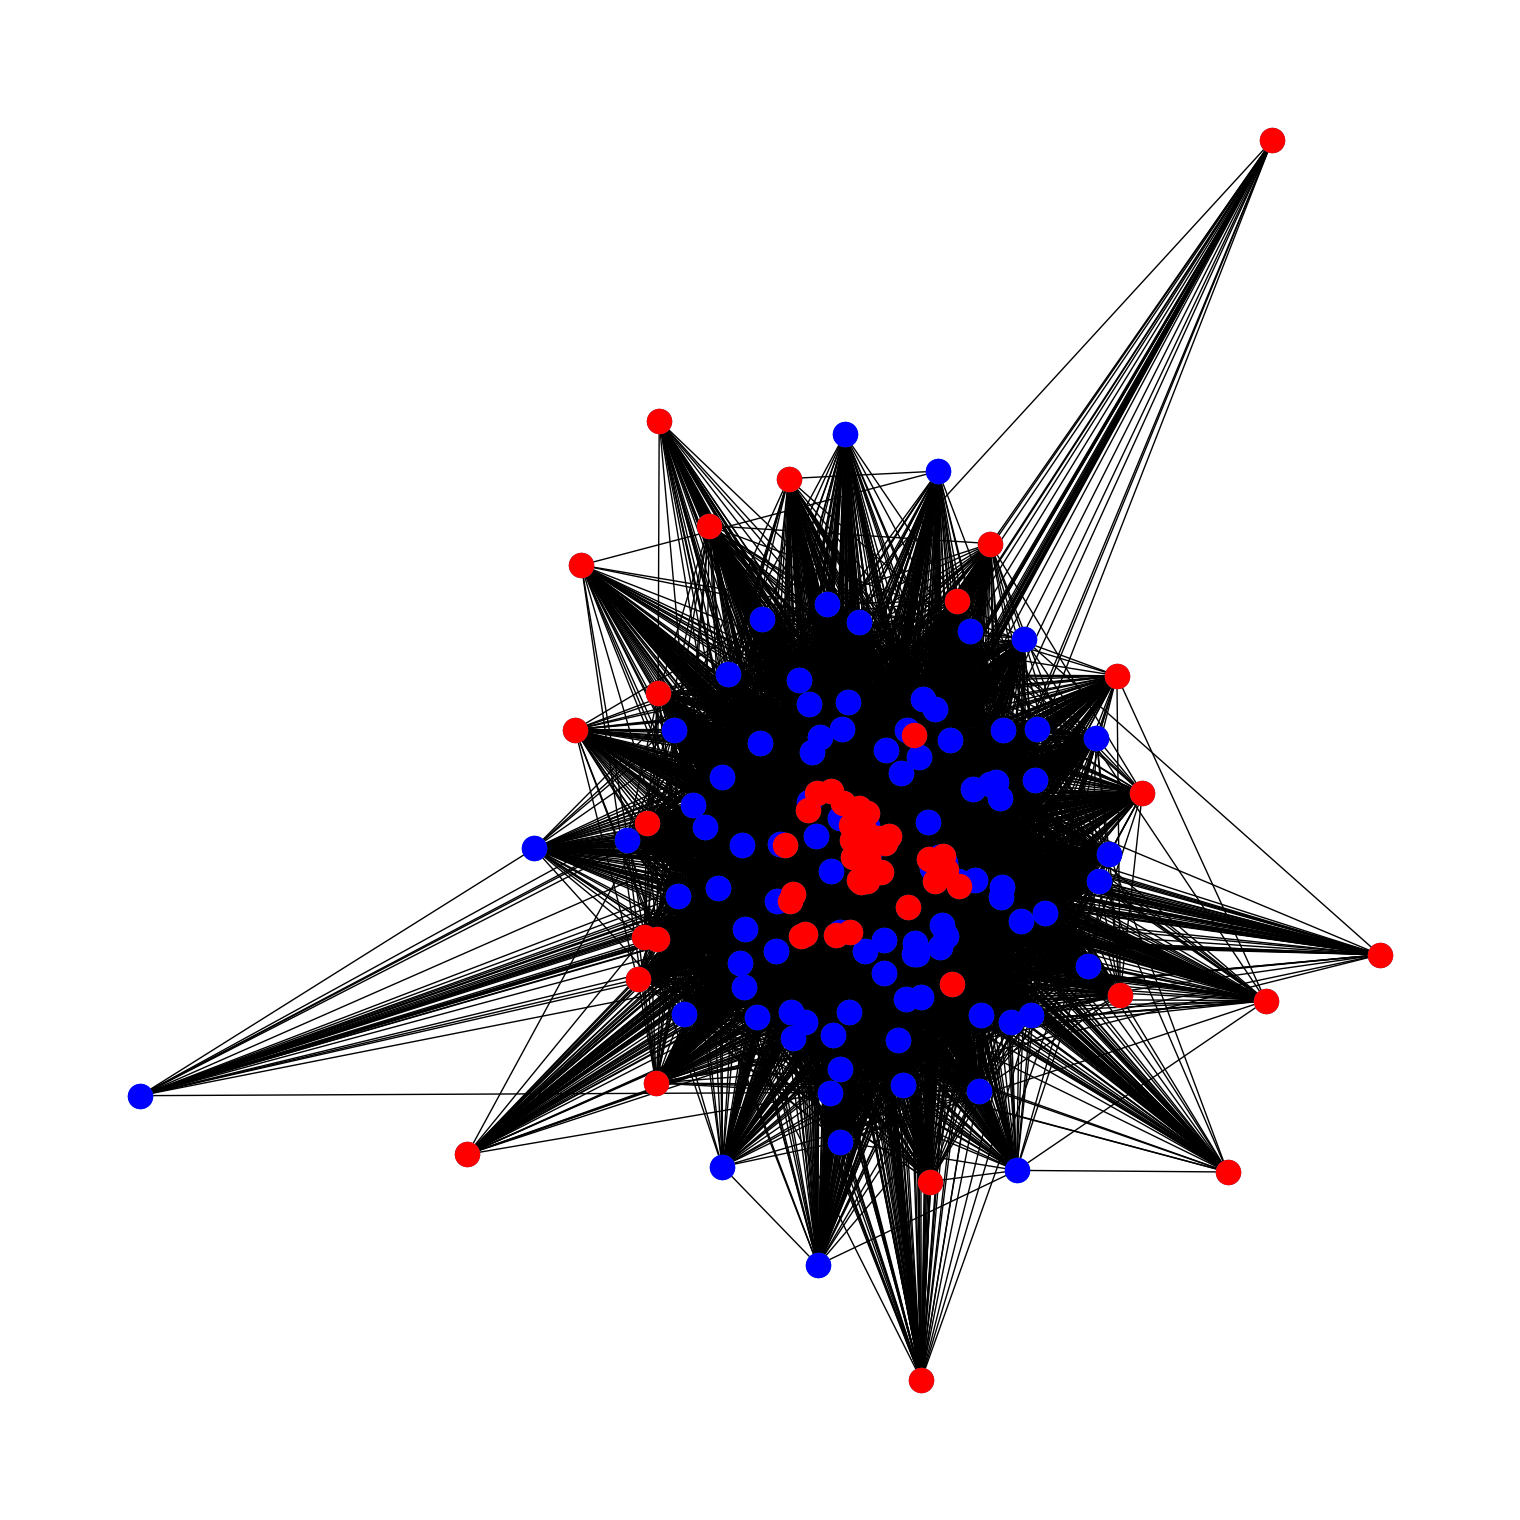

In [56]:
plt.figure(figsize=(15, 15))  # Set the size of the plot
nx.draw(data_item_graph, pos_di)
nx.draw_networkx_nodes(data_item_graph, pos_di, nodelist=date_item_communities[0], node_color='b')
nx.draw_networkx_nodes(data_item_graph, pos_di, nodelist=date_item_communities[1], node_color='r')


In [58]:
nx.diameter(data_item_graph)

2

In [59]:
closeness_id = nx.closeness_centrality(data_item_graph, distance='weight')

In [63]:
print(sorted(closeness_id.items(), key= lambda x: x[1], reverse=True)[0:3])

[('frozen fruits', 0.5303514376996805), ('frozen chicken', 0.5303514376996805), ('soups', 0.5220125786163522)]


In [64]:
betweenness_id = nx.betweenness_centrality(data_item_graph, weight='weight')

In [65]:
print(sorted(betweenness_id.items(), key= lambda x: x[1], reverse=True)[0:3])

[('frozen chicken', 0.09099644926529857), ('kitchen utensil', 0.08479761396119648), ('preservation products', 0.07455301431027174)]


In [72]:
centrality_id = nx.transitivity(data_item_graph)

In [73]:
print(centrality_id)

0.9245802553146049


In [80]:
clustering_id = nx.clustering(data_item_graph, weight='weight')

In [81]:
print(sorted(clustering_id.items(), key= lambda x: x[1], reverse=True)[0:3])

[('whole milk', 0.10284929432739363), ('other vegetables', 0.09966315666492821), ('rolls/buns', 0.09951427675254176)]


In [105]:
nx.density(data_item_graph)

0.8841353437702908

# Network with customer as nodes and edge if the same item was bought on the same day (edges of weight 1 removed)

In [84]:
cust_date_item_dataset = pd.read_csv('./processed_cust_date_items_grocery_dataset.csv')

In [85]:
cust_date_item_graph: nx.Graph = nx.from_pandas_edgelist(cust_date_item_dataset, 'source', 'dest', 'weight')

In [86]:
pos_cdi = nx.spring_layout(cust_date_item_graph)

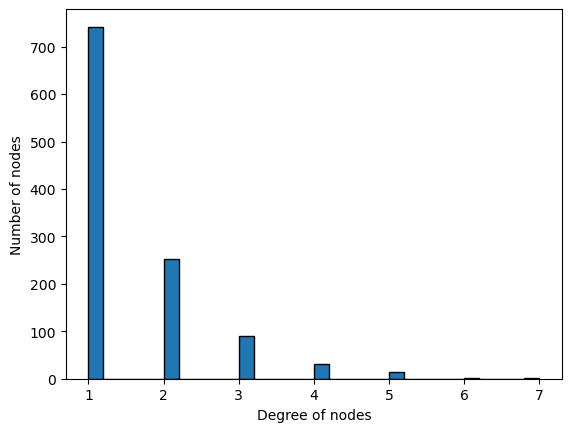

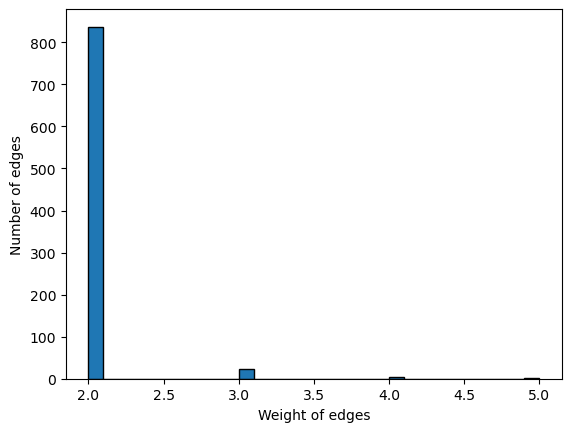

In [99]:
degreedist(cust_date_item_graph)
edge_weight_distribution(cust_date_item_graph)

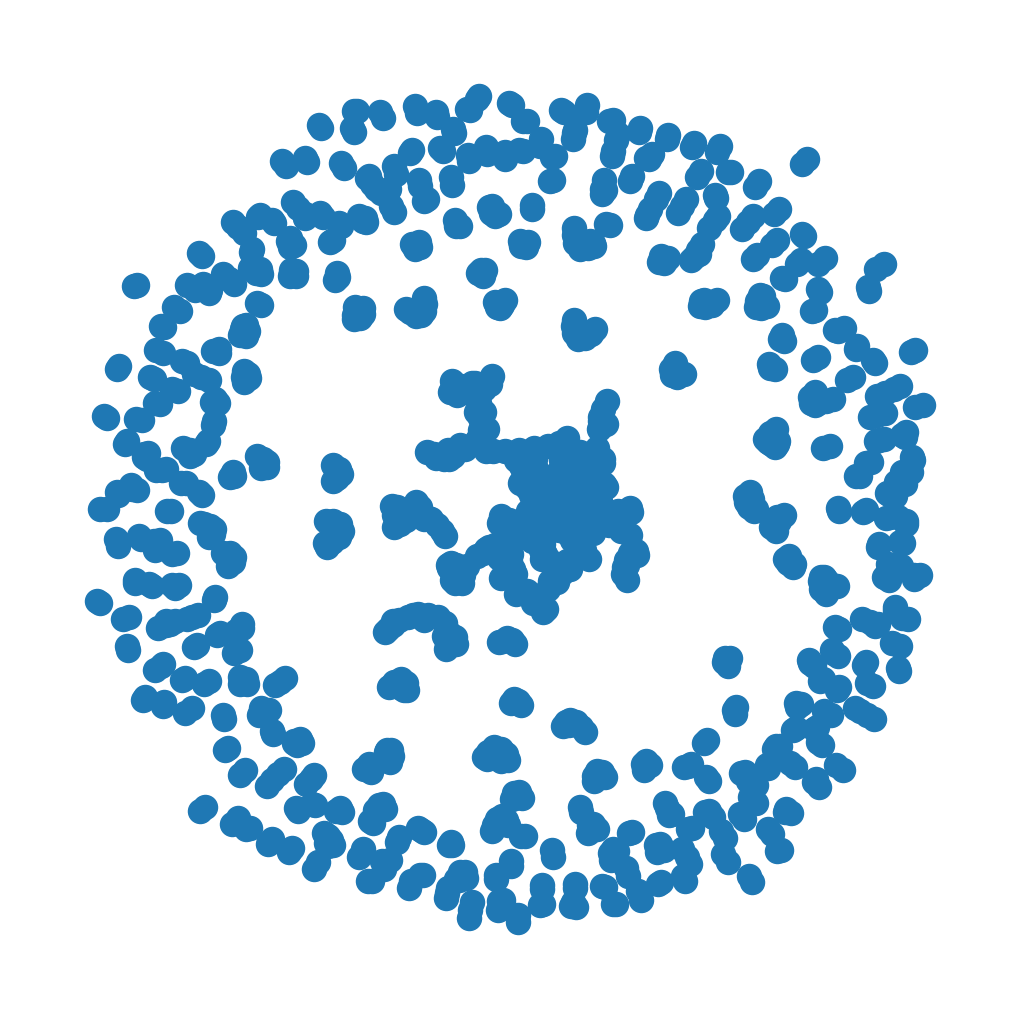

In [53]:
plt.figure(figsize=(10, 10))
nx.draw(cust_date_item_graph, pos_cdi)

In [24]:
cdi_communities = nx.community.greedy_modularity_communities(cust_date_item_graph, 'weigth')

In [26]:
print(len(cdi_communities))
print(nx.community.modularity(cust_date_item_graph, cdi_communities))

319
0.9883683930957358


In [93]:
print(len(cust_date_item_graph.edges))
print(len(cust_date_item_graph.nodes))

865
1132


In [28]:
node_color = []
for node in cust_date_item_graph:
    for i in range(len(cdi_communities)):
        if node in cdi_communities[i]:
            node_color.append(i*100)
            break

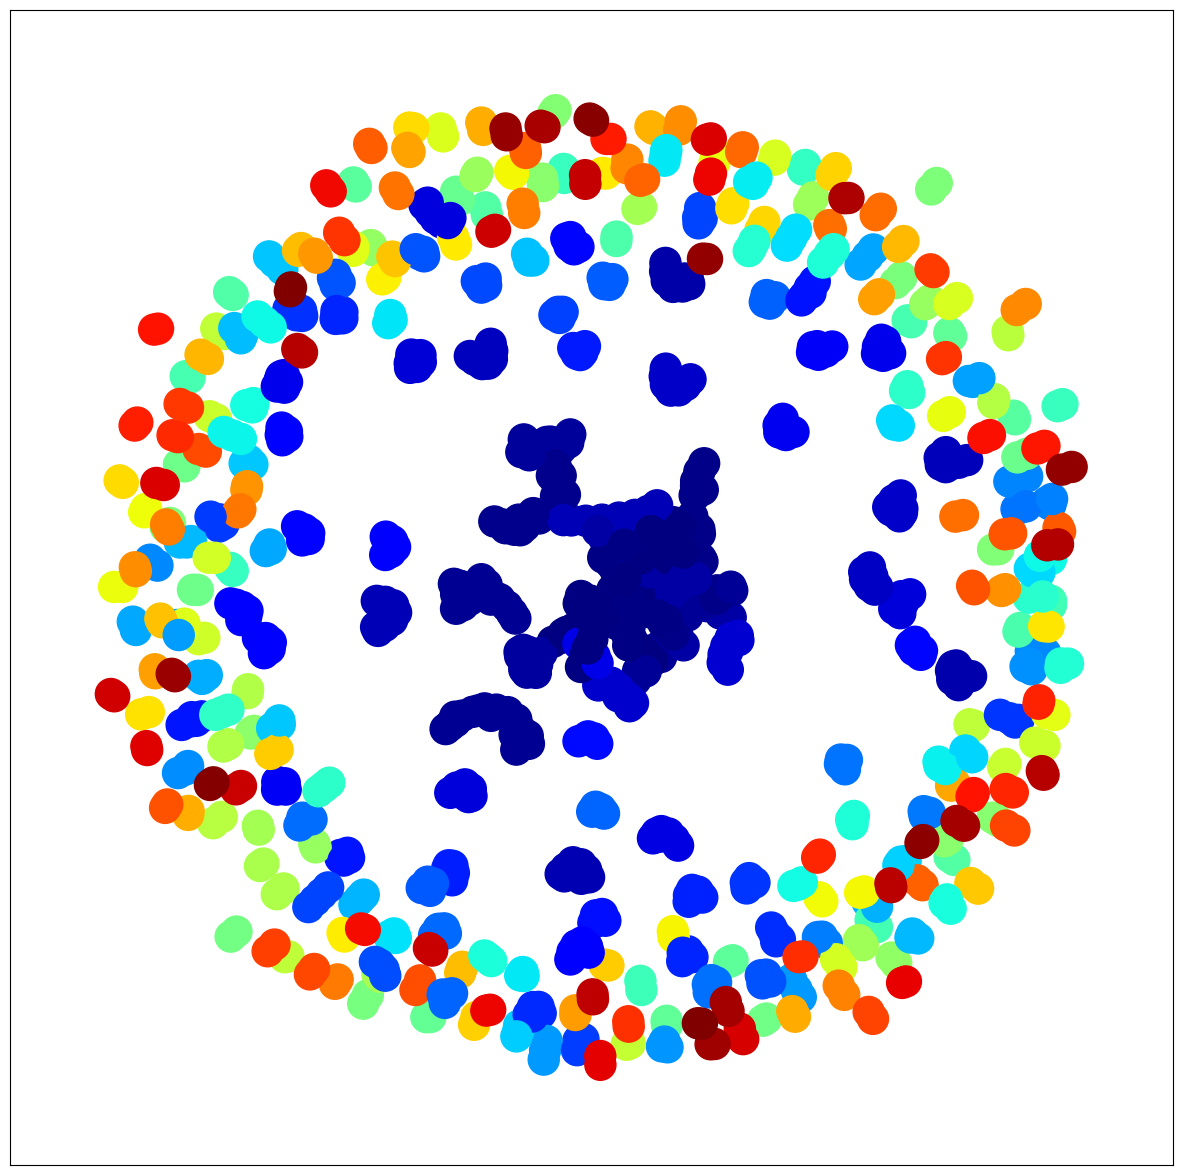

In [55]:
plt.figure(figsize=(15, 15))  # Set the size of the plot

nx.draw_networkx_nodes(cust_date_item_graph, pos_cdi, node_color=node_color, cmap=plt.get_cmap('jet'), node_size=500)
nx.draw_networkx_edges(cust_date_item_graph, pos_cdi, width=1, alpha=0.5)

In [106]:
nx.density(cust_date_item_graph)

0.0013512542451253307

# Testing G(n, p)

In [28]:
test_G = nx.gnp_random_graph(1000, 0.33)

In [30]:
community_tg = nx.community.greedy_modularity_communities(G)

In [31]:
print(len(community_tg))
print(nx.community.modularity(test_G, community_tg))

3


NotAPartition: [frozenset({4097, 4099, 4101, 4102, 4104, 4106, 4109, 4112, 4119, 4122, 4123, 4134, 4135, 4137, 4139, 4140, 4141, 4144, 4146, 4147, 4149, 4150, 4151, 4153, 4154, 4155, 4156, 4157, 4159, 4160, 4161, 4164, 4165, 4166, 4168, 4169, 4172, 4174, 4176, 4180, 4182, 4183, 4186, 4188, 4190, 4191, 4193, 4194, 4196, 4199, 4200, 4204, 4206, 4207, 4211, 4213, 4216, 4218, 4219, 4220, 4223, 4225, 4228, 4232, 4233, 4235, 4236, 4240, 4244, 4252, 4256, 4260, 4261, 4262, 4265, 4269, 4270, 4271, 4272, 4273, 4274, 4275, 4280, 4285, 4288, 4291, 4294, 4295, 4297, 4298, 4299, 4304, 4306, 4309, 4310, 4312, 4313, 4314, 4315, 4316, 4318, 4323, 4327, 4329, 4334, 4335, 4336, 4338, 4339, 4340, 4342, 4345, 4347, 4348, 4349, 4351, 4355, 4356, 4358, 4359, 4360, 4361, 4363, 4365, 4367, 4372, 4373, 4377, 4382, 4383, 4384, 4385, 4386, 4387, 4389, 4390, 4391, 4392, 4395, 4396, 4400, 4405, 4407, 4408, 4409, 4410, 4414, 4415, 4418, 4419, 4420, 4422, 4423, 4425, 4426, 4430, 4431, 4439, 4441, 4442, 4443, 4449, 4450, 4454, 4456, 4458, 4463, 4467, 4470, 4473, 4475, 4477, 4478, 4481, 4483, 4484, 4485, 4487, 4489, 4490, 4491, 4493, 4494, 4496, 4497, 4502, 4504, 4506, 4507, 4508, 4509, 4511, 4512, 4513, 4515, 4517, 4520, 4525, 4526, 4527, 4529, 4530, 4533, 4536, 4539, 4544, 4546, 4547, 4554, 4555, 4561, 4563, 4567, 4571, 4573, 4575, 4576, 4580, 4583, 4586, 4587, 4597, 4600, 4602, 4603, 4606, 4607, 4608, 4611, 4616, 4619, 4622, 4623, 4632, 4634, 4638, 4640, 4641, 4643, 4646, 4650, 4651, 4655, 4659, 4663, 4664, 4665, 4666, 4669, 4672, 4673, 4674, 4676, 4677, 4678, 4679, 4681, 4684, 4687, 4690, 4691, 4692, 4693, 4696, 4697, 4699, 4700, 4701, 4702, 4704, 4707, 4709, 4712, 4714, 4718, 4725, 4726, 4728, 4729, 4730, 4733, 4735, 4740, 4742, 4745, 4753, 4756, 4759, 4763, 4765, 4766, 4771, 4782, 4786, 4789, 4792, 4796, 4797, 4799, 4800, 4801, 4803, 4805, 4807, 4809, 4811, 4813, 4819, 4820, 4823, 4825, 4826, 4827, 4828, 4830, 4832, 4833, 4834, 4835, 4837, 4840, 4844, 4845, 4846, 4847, 4849, 4852, 4855, 4857, 4858, 4859, 4860, 4867, 4868, 4870, 4871, 4874, 4875, 4877, 4878, 4880, 4883, 4885, 4889, 4890, 4891, 4894, 4900, 4901, 4902, 4904, 4907, 4909, 4911, 4914, 4916, 4919, 4922, 4925, 4927, 4929, 4932, 4937, 4938, 4939, 4951, 4953, 4954, 4957, 4960, 4961, 4963, 4965, 4974, 4976, 4977, 4979, 4981, 4985, 4986, 4992, 4993, 4996, 4997, 1001, 1002, 1006, 1010, 1013, 1015, 1019, 1027, 1028, 1029, 1042, 1043, 1046, 1048, 1053, 1054, 1056, 1061, 1063, 1064, 1065, 1066, 1067, 1075, 1079, 1082, 1083, 1097, 1101, 1107, 1108, 1109, 1111, 1117, 1119, 1120, 1122, 1126, 1127, 1132, 1135, 1136, 1137, 1138, 1143, 1144, 1147, 1150, 1152, 1153, 1154, 1157, 1159, 1164, 1165, 1166, 1169, 1170, 1171, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1182, 1184, 1185, 1186, 1187, 1188, 1191, 1192, 1193, 1194, 1195, 1198, 1200, 1201, 1212, 1213, 1216, 1217, 1219, 1221, 1226, 1229, 1230, 1232, 1233, 1236, 1237, 1238, 1241, 1242, 1244, 1248, 1249, 1252, 1254, 1261, 1262, 1263, 1267, 1268, 1269, 1270, 1273, 1278, 1283, 1287, 1288, 1291, 1292, 1293, 1304, 1307, 1308, 1321, 1322, 1323, 1325, 1330, 1332, 1333, 1336, 1337, 1338, 1339, 1340, 1342, 1343, 1344, 1345, 1347, 1348, 1349, 1352, 1353, 1354, 1356, 1360, 1362, 1363, 1364, 1365, 1368, 1369, 1371, 1372, 1374, 1378, 1382, 1387, 1390, 1394, 1397, 1404, 1405, 1407, 1408, 1411, 1413, 1414, 1418, 1421, 1423, 1424, 1425, 1427, 1439, 1443, 1445, 1446, 1449, 1451, 1452, 1453, 1454, 1456, 1459, 1461, 1462, 1466, 1473, 1474, 1478, 1480, 1482, 1485, 1488, 1489, 1490, 1491, 1498, 1499, 1500, 1501, 1503, 1505, 1511, 1514, 1516, 1521, 1523, 1527, 1529, 1533, 1534, 1535, 1545, 1546, 1547, 1549, 1550, 1562, 1563, 1565, 1574, 1577, 1578, 1580, 1586, 1590, 1591, 1596, 1597, 1601, 1603, 1605, 1608, 1609, 1614, 1616, 1618, 1619, 1622, 1623, 1624, 1630, 1632, 1633, 1635, 1636, 1638, 1644, 1645, 1646, 1651, 1654, 1655, 1656, 1657, 1660, 1662, 1664, 1665, 1667, 1669, 1670, 1673, 1676, 1678, 1679, 1681, 1683, 1684, 1685, 1686, 1689, 1692, 1699, 1703, 1705, 1708, 1715, 1716, 1717, 1719, 1721, 1722, 1724, 1726, 1727, 1728, 1729, 1730, 1736, 1746, 1750, 1754, 1755, 1756, 1759, 1761, 1762, 1765, 1767, 1769, 1770, 1778, 1779, 1784, 1785, 1787, 1792, 1793, 1795, 1799, 1800, 1805, 1808, 1809, 1810, 1813, 1814, 1816, 1817, 1820, 1822, 1823, 1825, 1830, 1831, 1834, 1841, 1845, 1848, 1849, 1851, 1852, 1853, 1854, 1855, 1856, 1859, 1861, 1862, 1863, 1870, 1875, 1877, 1881, 1883, 1885, 1891, 1894, 1895, 1903, 1908, 1912, 1913, 1918, 1920, 1921, 1923, 1925, 1928, 1930, 1931, 1937, 1938, 1941, 1943, 1944, 1946, 1947, 1948, 1949, 1950, 1953, 1954, 1958, 1962, 1967, 1968, 1969, 1970, 1973, 1974, 1976, 1977, 1980, 1981, 1983, 1988, 1992, 1997, 1998, 2001, 2007, 2008, 2012, 2017, 2019, 2021, 2023, 2025, 2026, 2031, 2032, 2034, 2036, 2037, 2038, 2046, 2048, 2049, 2056, 2057, 2062, 2064, 2069, 2071, 2074, 2076, 2077, 2079, 2080, 2081, 2082, 2083, 2085, 2086, 2087, 2089, 2091, 2093, 2094, 2095, 2103, 2105, 2110, 2112, 2114, 2117, 2121, 2127, 2128, 2132, 2133, 2134, 2135, 2136, 2137, 2138, 2145, 2148, 2149, 2151, 2152, 2155, 2156, 2157, 2158, 2160, 2161, 2162, 2167, 2169, 2170, 2171, 2174, 2176, 2179, 2181, 2185, 2186, 2187, 2188, 2190, 2192, 2193, 2194, 2199, 2200, 2201, 2205, 2209, 2210, 2211, 2212, 2215, 2231, 2232, 2234, 2235, 2236, 2237, 2244, 2246, 2247, 2249, 2250, 2251, 2252, 2253, 2254, 2255, 2256, 2261, 2262, 2265, 2267, 2269, 2279, 2281, 2282, 2283, 2284, 2286, 2289, 2290, 2291, 2292, 2294, 2297, 2302, 2303, 2304, 2305, 2306, 2307, 2311, 2318, 2323, 2325, 2326, 2327, 2328, 2332, 2335, 2337, 2338, 2339, 2341, 2342, 2345, 2346, 2353, 2358, 2359, 2361, 2362, 2363, 2368, 2369, 2370, 2374, 2376, 2380, 2395, 2396, 2399, 2400, 2407, 2410, 2415, 2420, 2423, 2426, 2427, 2429, 2432, 2433, 2434, 2435, 2436, 2437, 2438, 2439, 2440, 2443, 2446, 2450, 2451, 2452, 2459, 2460, 2461, 2463, 2465, 2466, 2469, 2470, 2473, 2475, 2476, 2477, 2478, 2479, 2480, 2488, 2493, 2495, 2499, 2500, 2501, 2502, 2503, 2504, 2506, 2507, 2508, 2510, 2511, 2514, 2523, 2524, 2525, 2527, 2534, 2536, 2538, 2540, 2548, 2549, 2550, 2551, 2552, 2556, 2559, 2566, 2574, 2575, 2576, 2581, 2584, 2585, 2589, 2590, 2597, 2602, 2604, 2606, 2607, 2611, 2612, 2614, 2615, 2616, 2623, 2625, 2629, 2632, 2633, 2635, 2637, 2641, 2643, 2648, 2649, 2650, 2651, 2657, 2660, 2661, 2666, 2668, 2671, 2675, 2676, 2678, 2681, 2684, 2685, 2686, 2689, 2691, 2692, 2695, 2696, 2701, 2702, 2703, 2704, 2705, 2706, 2719, 2722, 2725, 2727, 2728, 2729, 2730, 2731, 2736, 2738, 2744, 2749, 2750, 2751, 2753, 2754, 2755, 2761, 2762, 2766, 2769, 2772, 2773, 2783, 2784, 2785, 2787, 2792, 2795, 2798, 2800, 2801, 2802, 2805, 2806, 2809, 2812, 2817, 2818, 2822, 2827, 2828, 2829, 2832, 2833, 2836, 2838, 2839, 2843, 2848, 2850, 2852, 2854, 2861, 2862, 2863, 2864, 2866, 2867, 2868, 2872, 2873, 2874, 2876, 2878, 2880, 2881, 2884, 2885, 2887, 2890, 2893, 2895, 2902, 2903, 2905, 2906, 2915, 2916, 2918, 2920, 2927, 2928, 2930, 2931, 2934, 2935, 2938, 2939, 2945, 2946, 2949, 2950, 2952, 2957, 2958, 2962, 2963, 2964, 2966, 2968, 2972, 2976, 2980, 2981, 2984, 2985, 2986, 2990, 2991, 2992, 2995, 2997, 3003, 3004, 3005, 3011, 3012, 3013, 3017, 3021, 3026, 3030, 3031, 3032, 3033, 3037, 3039, 3040, 3042, 3043, 3045, 3051, 3052, 3060, 3061, 3062, 3066, 3067, 3069, 3071, 3074, 3077, 3082, 3083, 3084, 3085, 3094, 3095, 3097, 3099, 3100, 3102, 3103, 3104, 3106, 3108, 3111, 3112, 3115, 3116, 3123, 3124, 3127, 3138, 3139, 3140, 3141, 3142, 3145, 3147, 3150, 3151, 3152, 3154, 3155, 3158, 3159, 3162, 3166, 3172, 3174, 3176, 3182, 3184, 3188, 3196, 3198, 3199, 3201, 3203, 3208, 3211, 3212, 3215, 3216, 3217, 3219, 3220, 3221, 3222, 3224, 3229, 3234, 3235, 3240, 3241, 3243, 3245, 3248, 3250, 3251, 3252, 3253, 3254, 3260, 3265, 3268, 3270, 3273, 3279, 3280, 3288, 3292, 3294, 3299, 3302, 3303, 3305, 3309, 3311, 3312, 3313, 3324, 3325, 3326, 3327, 3328, 3331, 3334, 3338, 3339, 3341, 3343, 3345, 3346, 3348, 3350, 3351, 3356, 3360, 3365, 3373, 3374, 3375, 3378, 3379, 3383, 3384, 3387, 3393, 3395, 3397, 3398, 3400, 3403, 3404, 3405, 3407, 3408, 3411, 3414, 3415, 3417, 3420, 3425, 3431, 3435, 3439, 3442, 3444, 3447, 3448, 3449, 3452, 3457, 3458, 3459, 3460, 3464, 3466, 3472, 3473, 3477, 3480, 3487, 3493, 3494, 3500, 3502, 3507, 3508, 3509, 3510, 3511, 3518, 3519, 3520, 3522, 3523, 3524, 3525, 3532, 3535, 3536, 3540, 3542, 3543, 3544, 3545, 3546, 3554, 3555, 3556, 3559, 3560, 3561, 3563, 3564, 3565, 3570, 3575, 3580, 3582, 3583, 3584, 3585, 3586, 3588, 3590, 3591, 3595, 3596, 3599, 3600, 3602, 3603, 3607, 3608, 3613, 3614, 3617, 3618, 3621, 3622, 3623, 3625, 3627, 3634, 3636, 3638, 3640, 3641, 3647, 3650, 3652, 3653, 3654, 3655, 3659, 3661, 3662, 3663, 3664, 3665, 3668, 3669, 3671, 3673, 3675, 3677, 3679, 3680, 3681, 3682, 3683, 3684, 3686, 3687, 3693, 3694, 3695, 3696, 3697, 3699, 3700, 3711, 3713, 3715, 3718, 3721, 3727, 3735, 3736, 3739, 3740, 3741, 3744, 3748, 3749, 3751, 3754, 3755, 3757, 3759, 3761, 3763, 3765, 3766, 3768, 3771, 3773, 3774, 3777, 3778, 3782, 3786, 3789, 3792, 3794, 3796, 3802, 3803, 3804, 3807, 3808, 3809, 3812, 3813, 3814, 3815, 3819, 3823, 3824, 3825, 3827, 3832, 3837, 3838, 3842, 3846, 3848, 3849, 3851, 3852, 3854, 3857, 3860, 3861, 3863, 3864, 3866, 3868, 3871, 3872, 3877, 3878, 3881, 3882, 3883, 3884, 3885, 3886, 3887, 3898, 3901, 3902, 3903, 3906, 3916, 3918, 3920, 3923, 3924, 3925, 3927, 3928, 3933, 3934, 3937, 3938, 3940, 3945, 3946, 3948, 3949, 3954, 3957, 3958, 3960, 3963, 3964, 3966, 3969, 3971, 3972, 3979, 3985, 3991, 3996, 4003, 4012, 4015, 4034, 4036, 4037, 4039, 4045, 4046, 4049, 4050, 4051, 4052, 4053, 4054, 4058, 4061, 4064, 4065, 4066, 4067, 4075, 4076, 4078, 4079, 4080, 4081, 4084, 4086, 4095}), frozenset({4096, 4098, 4100, 4103, 4105, 4107, 4108, 4110, 4114, 4115, 4116, 4117, 4120, 4121, 4125, 4127, 4129, 4130, 4131, 4132, 4133, 4138, 4148, 4162, 4170, 4171, 4173, 4177, 4178, 4184, 4189, 4192, 4197, 4198, 4202, 4205, 4209, 4212, 4214, 4215, 4221, 4222, 4226, 4227, 4230, 4231, 4239, 4241, 4242, 4243, 4245, 4246, 4249, 4250, 4254, 4255, 4257, 4258, 4259, 4264, 4266, 4267, 4268, 4277, 4281, 4284, 4286, 4290, 4292, 4296, 4300, 4301, 4302, 4305, 4307, 4308, 4311, 4319, 4320, 4321, 4322, 4324, 4325, 4326, 4328, 4330, 4331, 4337, 4344, 4352, 4357, 4362, 4364, 4368, 4369, 4370, 4374, 4375, 4388, 4393, 4394, 4397, 4401, 4402, 4403, 4412, 4413, 4416, 4417, 4424, 4427, 4428, 4432, 4433, 4440, 4445, 4448, 4453, 4455, 4461, 4462, 4466, 4468, 4471, 4472, 4474, 4482, 4492, 4498, 4500, 4503, 4516, 4518, 4519, 4521, 4528, 4531, 4535, 4537, 4538, 4540, 4541, 4548, 4550, 4552, 4553, 4556, 4557, 4559, 4564, 4569, 4574, 4578, 4579, 4584, 4589, 4591, 4592, 4595, 4596, 4598, 4601, 4605, 4609, 4610, 4612, 4614, 4615, 4617, 4620, 4621, 4625, 4628, 4629, 4630, 4633, 4635, 4636, 4637, 4648, 4652, 4653, 4657, 4658, 4660, 4670, 4675, 4680, 4682, 4685, 4686, 4688, 4694, 4703, 4705, 4706, 4708, 4711, 4713, 4715, 4716, 4717, 4719, 4722, 4724, 4727, 4731, 4734, 4736, 4738, 4739, 4741, 4744, 4746, 4750, 4752, 4757, 4761, 4762, 4768, 4769, 4772, 4773, 4774, 4775, 4776, 4778, 4779, 4780, 4781, 4783, 4787, 4788, 4791, 4793, 4795, 4798, 4806, 4808, 4810, 4814, 4817, 4821, 4822, 4824, 4829, 4838, 4839, 4841, 4842, 4843, 4851, 4853, 4854, 4862, 4863, 4866, 4869, 4872, 4876, 4879, 4881, 4887, 4892, 4895, 4898, 4903, 4906, 4915, 4918, 4920, 4923, 4924, 4928, 4931, 4936, 4942, 4946, 4947, 4952, 4955, 4956, 4962, 4964, 4966, 4968, 4969, 4971, 4972, 4973, 4982, 4983, 4984, 4990, 4991, 4994, 4999, 1000, 1003, 1008, 1009, 1011, 1012, 1014, 1017, 1020, 1021, 1022, 1023, 1026, 1032, 1033, 1034, 1035, 1037, 1038, 1040, 1041, 1045, 1049, 1050, 1055, 1058, 1059, 1062, 1068, 1070, 1071, 1073, 1076, 1081, 1085, 1086, 1087, 1088, 1089, 1090, 1092, 1095, 1100, 1102, 1103, 1104, 1105, 1110, 1112, 1113, 1114, 1115, 1118, 1123, 1124, 1125, 1129, 1130, 1133, 1134, 1141, 1148, 1149, 1155, 1158, 1160, 1161, 1162, 1163, 1168, 1181, 1183, 1197, 1199, 1202, 1204, 1205, 1207, 1208, 1209, 1214, 1215, 1218, 1220, 1223, 1224, 1227, 1231, 1234, 1235, 1239, 1246, 1253, 1256, 1257, 1258, 1259, 1260, 1264, 1272, 1276, 1277, 1279, 1282, 1285, 1286, 1289, 1290, 1295, 1296, 1297, 1299, 1300, 1301, 1302, 1303, 1305, 1306, 1309, 1310, 1317, 1318, 1324, 1326, 1328, 1329, 1334, 1335, 1341, 1350, 1355, 1358, 1367, 1370, 1373, 1376, 1377, 1380, 1385, 1391, 1393, 1396, 1398, 1401, 1406, 1409, 1415, 1416, 1417, 1419, 1426, 1429, 1430, 1431, 1433, 1435, 1436, 1438, 1440, 1442, 1450, 1457, 1460, 1463, 1464, 1465, 1467, 1468, 1471, 1472, 1475, 1476, 1481, 1483, 1484, 1486, 1487, 1492, 1493, 1494, 1497, 1502, 1504, 1507, 1508, 1509, 1512, 1513, 1517, 1518, 1519, 1520, 1522, 1525, 1526, 1528, 1530, 1531, 1532, 1536, 1537, 1538, 1540, 1542, 1551, 1553, 1554, 1556, 1557, 1559, 1560, 1561, 1564, 1567, 1570, 1571, 1575, 1581, 1582, 1583, 1584, 1587, 1588, 1589, 1593, 1594, 1595, 1602, 1604, 1610, 1611, 1612, 1613, 1615, 1620, 1621, 1625, 1626, 1628, 1629, 1631, 1640, 1642, 1643, 1647, 1648, 1649, 1652, 1653, 1658, 1659, 1663, 1666, 1668, 1672, 1674, 1677, 1682, 1687, 1690, 1696, 1698, 1702, 1706, 1707, 1709, 1711, 1712, 1720, 1723, 1725, 1731, 1732, 1733, 1734, 1737, 1738, 1739, 1742, 1745, 1751, 1757, 1758, 1760, 1764, 1768, 1771, 1772, 1773, 1774, 1776, 1777, 1780, 1781, 1782, 1783, 1786, 1788, 1789, 1790, 1791, 1794, 1796, 1797, 1798, 1803, 1804, 1811, 1812, 1815, 1818, 1824, 1826, 1828, 1829, 1832, 1833, 1836, 1837, 1839, 1842, 1843, 1844, 1846, 1850, 1857, 1858, 1860, 1864, 1865, 1866, 1867, 1868, 1869, 1872, 1873, 1874, 1879, 1888, 1889, 1892, 1893, 1896, 1897, 1898, 1900, 1901, 1902, 1904, 1905, 1907, 1909, 1910, 1911, 1916, 1917, 1922, 1926, 1929, 1932, 1934, 1935, 1939, 1940, 1945, 1951, 1955, 1956, 1960, 1961, 1963, 1965, 1966, 1971, 1975, 1978, 1979, 1982, 1985, 1987, 1990, 1991, 1994, 1995, 1996, 2003, 2004, 2005, 2010, 2011, 2013, 2014, 2020, 2022, 2024, 2029, 2033, 2035, 2041, 2042, 2044, 2045, 2047, 2053, 2054, 2055, 2058, 2059, 2061, 2063, 2065, 2066, 2067, 2068, 2070, 2072, 2073, 2075, 2088, 2092, 2096, 2097, 2100, 2101, 2102, 2104, 2106, 2108, 2109, 2113, 2116, 2119, 2120, 2123, 2125, 2129, 2131, 2139, 2140, 2141, 2142, 2143, 2144, 2146, 2154, 2165, 2172, 2177, 2178, 2183, 2191, 2196, 2197, 2198, 2206, 2213, 2218, 2220, 2221, 2222, 2225, 2226, 2227, 2228, 2233, 2238, 2239, 2240, 2242, 2243, 2245, 2257, 2258, 2260, 2266, 2270, 2271, 2272, 2274, 2275, 2276, 2287, 2288, 2298, 2299, 2300, 2301, 2308, 2309, 2310, 2314, 2319, 2320, 2322, 2329, 2330, 2331, 2334, 2340, 2343, 2347, 2348, 2349, 2352, 2355, 2356, 2364, 2365, 2366, 2372, 2373, 2375, 2379, 2381, 2383, 2386, 2387, 2389, 2390, 2391, 2392, 2393, 2394, 2398, 2401, 2402, 2403, 2404, 2406, 2408, 2411, 2412, 2413, 2414, 2416, 2417, 2419, 2422, 2430, 2431, 2441, 2444, 2449, 2453, 2455, 2464, 2467, 2468, 2472, 2483, 2484, 2486, 2489, 2490, 2494, 2497, 2505, 2509, 2513, 2515, 2516, 2517, 2519, 2521, 2522, 2526, 2528, 2530, 2531, 2532, 2533, 2537, 2539, 2542, 2544, 2545, 2555, 2557, 2561, 2562, 2563, 2565, 2569, 2570, 2571, 2573, 2577, 2579, 2580, 2588, 2592, 2593, 2594, 2595, 2599, 2600, 2603, 2605, 2608, 2613, 2618, 2619, 2620, 2622, 2626, 2627, 2631, 2636, 2639, 2642, 2644, 2645, 2652, 2653, 2655, 2656, 2658, 2659, 2662, 2663, 2664, 2670, 2672, 2673, 2677, 2679, 2680, 2682, 2687, 2688, 2693, 2698, 2699, 2700, 2707, 2709, 2711, 2714, 2715, 2716, 2718, 2721, 2723, 2726, 2732, 2733, 2735, 2741, 2743, 2747, 2748, 2752, 2756, 2757, 2759, 2763, 2764, 2765, 2767, 2770, 2771, 2774, 2775, 2776, 2777, 2778, 2779, 2780, 2781, 2786, 2790, 2794, 2799, 2803, 2807, 2810, 2811, 2813, 2814, 2815, 2823, 2824, 2825, 2830, 2834, 2835, 2837, 2840, 2842, 2847, 2849, 2857, 2858, 2859, 2860, 2869, 2870, 2871, 2875, 2879, 2882, 2883, 2888, 2889, 2892, 2894, 2897, 2898, 2899, 2900, 2907, 2908, 2909, 2910, 2912, 2913, 2914, 2917, 2921, 2923, 2924, 2925, 2926, 2929, 2932, 2933, 2936, 2937, 2940, 2941, 2942, 2943, 2944, 2947, 2948, 2951, 2954, 2955, 2956, 2965, 2967, 2973, 2974, 2978, 2979, 2982, 2988, 2989, 2993, 2994, 2998, 2999, 3001, 3002, 3007, 3009, 3014, 3015, 3022, 3023, 3025, 3027, 3028, 3034, 3035, 3036, 3038, 3041, 3046, 3047, 3048, 3049, 3054, 3058, 3059, 3063, 3065, 3068, 3072, 3078, 3080, 3081, 3086, 3087, 3088, 3089, 3092, 3093, 3096, 3098, 3101, 3105, 3107, 3110, 3117, 3118, 3119, 3120, 3125, 3126, 3128, 3129, 3130, 3131, 3132, 3133, 3135, 3144, 3148, 3153, 3156, 3157, 3160, 3161, 3163, 3164, 3165, 3169, 3170, 3177, 3178, 3179, 3181, 3185, 3189, 3190, 3193, 3195, 3197, 3200, 3202, 3204, 3205, 3207, 3210, 3214, 3225, 3226, 3227, 3228, 3231, 3233, 3236, 3237, 3239, 3242, 3244, 3256, 3257, 3258, 3259, 3264, 3267, 3269, 3271, 3272, 3275, 3276, 3277, 3281, 3282, 3283, 3284, 3285, 3286, 3287, 3290, 3293, 3295, 3296, 3297, 3298, 3306, 3307, 3310, 3314, 3315, 3316, 3317, 3321, 3322, 3323, 3329, 3333, 3337, 3342, 3344, 3349, 3352, 3354, 3357, 3359, 3363, 3364, 3366, 3367, 3369, 3380, 3381, 3382, 3385, 3386, 3389, 3390, 3394, 3396, 3401, 3406, 3409, 3410, 3413, 3418, 3421, 3423, 3424, 3426, 3427, 3437, 3438, 3440, 3443, 3445, 3451, 3456, 3461, 3463, 3465, 3467, 3468, 3469, 3475, 3476, 3479, 3483, 3486, 3489, 3491, 3495, 3499, 3517, 3521, 3526, 3528, 3529, 3531, 3534, 3537, 3538, 3539, 3550, 3552, 3557, 3566, 3567, 3569, 3571, 3573, 3574, 3576, 3578, 3579, 3581, 3589, 3597, 3601, 3605, 3609, 3610, 3611, 3612, 3615, 3620, 3628, 3629, 3632, 3633, 3637, 3639, 3644, 3645, 3649, 3651, 3656, 3658, 3660, 3666, 3667, 3672, 3674, 3676, 3678, 3688, 3689, 3690, 3691, 3692, 3698, 3703, 3704, 3705, 3706, 3707, 3708, 3709, 3710, 3712, 3716, 3717, 3720, 3722, 3724, 3726, 3732, 3733, 3738, 3742, 3745, 3746, 3747, 3750, 3753, 3756, 3758, 3762, 3764, 3767, 3769, 3770, 3772, 3775, 3776, 3779, 3784, 3787, 3790, 3791, 3795, 3797, 3798, 3801, 3806, 3810, 3817, 3818, 3820, 3821, 3822, 3828, 3829, 3830, 3831, 3835, 3836, 3839, 3840, 3841, 3843, 3844, 3847, 3856, 3862, 3869, 3870, 3879, 3888, 3890, 3892, 3894, 3895, 3896, 3897, 3900, 3904, 3908, 3909, 3910, 3912, 3917, 3919, 3922, 3926, 3929, 3930, 3935, 3943, 3944, 3950, 3952, 3953, 3955, 3956, 3961, 3962, 3965, 3968, 3974, 3976, 3977, 3978, 3980, 3982, 3983, 3986, 3987, 3990, 3997, 3998, 3999, 4002, 4004, 4006, 4007, 4008, 4009, 4010, 4013, 4014, 4016, 4017, 4018, 4019, 4020, 4021, 4022, 4024, 4025, 4030, 4031, 4032, 4035, 4038, 4040, 4041, 4042, 4047, 4056, 4059, 4062, 4063, 4068, 4070, 4071, 4074, 4077, 4082, 4083, 4085, 4088, 4089, 4090, 4091, 4092, 4093, 4094}), frozenset({2050, 2051, 2060, 4113, 2039, 4118, 4124, 2078, 4126, 2084, 4136, 4142, 4143, 4145, 2098, 4152, 2107, 4158, 2111, 2115, 4163, 2118, 4167, 2122, 2126, 4175, 4179, 4181, 4185, 4187, 2147, 4195, 2153, 4201, 2159, 4208, 4210, 2164, 2166, 2168, 4217, 2173, 2175, 4224, 2180, 4229, 2184, 4234, 4237, 4238, 2195, 4247, 4248, 2202, 4251, 2203, 2204, 2207, 2208, 2214, 2216, 2217, 2219, 2229, 4278, 4279, 2230, 4282, 4283, 4287, 2241, 4289, 4293, 2248, 4303, 2259, 2263, 2264, 4317, 2273, 2277, 2278, 2280, 4332, 4333, 2285, 2293, 4341, 2295, 4343, 2296, 4353, 4354, 2312, 2313, 2315, 2316, 4366, 2321, 4371, 2324, 4376, 4378, 4379, 4380, 4381, 2336, 2344, 2350, 2351, 4398, 2354, 4404, 2357, 4406, 2360, 4411, 2371, 2377, 2378, 4429, 2384, 4434, 4435, 2388, 4437, 4436, 4444, 2397, 4447, 4451, 4452, 4457, 4459, 4460, 4464, 4465, 4469, 2421, 2424, 2425, 2428, 4479, 4480, 4486, 4488, 2442, 2445, 4495, 2447, 2448, 4499, 4501, 2454, 2456, 2457, 2458, 4505, 2462, 4510, 4514, 2471, 2474, 4522, 4523, 4524, 2481, 2482, 4532, 2485, 4534, 2487, 2492, 4542, 4543, 2496, 4551, 4558, 2512, 4560, 4562, 4565, 4566, 2518, 2520, 4570, 4572, 4577, 4581, 4582, 2535, 4585, 4588, 2541, 4590, 2543, 4593, 2546, 4594, 2547, 4599, 2553, 4604, 2558, 2560, 2564, 4613, 2567, 2568, 4618, 2572, 4624, 2578, 4627, 4626, 2582, 4631, 2583, 2586, 2587, 4639, 2591, 4642, 4644, 4645, 2598, 4647, 2601, 4649, 4654, 4656, 2609, 2610, 4661, 4662, 2617, 4667, 4668, 2621, 4671, 2624, 2628, 2630, 2634, 4683, 2638, 2640, 4689, 2646, 4695, 4698, 2654, 4710, 2665, 2667, 2669, 4720, 4721, 2674, 4723, 2683, 4732, 4737, 2690, 2694, 4743, 2697, 4747, 4748, 4749, 4751, 4755, 2708, 2710, 4758, 4760, 2712, 2713, 4764, 2717, 2720, 4770, 2724, 2734, 4784, 4785, 2737, 2739, 2740, 4790, 2742, 2745, 2746, 4794, 4802, 4804, 2758, 2760, 4812, 4815, 2768, 4816, 4818, 2782, 4831, 4836, 2789, 2788, 2791, 2796, 2797, 4848, 4850, 2804, 4856, 2808, 4861, 4864, 2816, 4865, 2820, 4873, 2826, 2831, 4882, 4884, 4886, 4888, 2841, 2844, 4893, 2845, 2846, 4896, 4897, 2851, 4899, 2853, 2855, 2856, 4905, 4908, 4910, 2865, 4913, 4917, 2877, 4926, 4930, 4933, 2886, 4935, 4934, 2891, 4940, 4941, 4943, 4944, 4945, 4948, 4949, 2901, 4950, 2904, 4958, 4959, 2911, 2919, 4967, 2922, 4970, 4975, 4978, 4980, 4987, 4988, 4989, 4995, 4998, 5000, 2953, 2960, 2961, 2969, 2970, 2971, 2975, 2977, 2983, 2987, 2996, 3000, 3006, 3008, 3010, 3016, 3018, 3019, 3020, 3024, 3029, 3044, 3050, 1004, 1005, 3053, 3055, 3056, 3057, 1016, 3064, 1018, 1024, 3073, 1025, 3075, 3076, 3079, 1031, 1036, 1039, 3090, 1044, 1047, 1051, 1052, 1057, 3109, 3113, 1069, 1072, 1074, 3122, 1077, 1078, 1080, 1084, 3134, 3136, 3137, 1093, 1094, 3143, 1096, 1098, 1099, 3146, 3149, 1116, 3167, 3168, 1121, 3171, 3173, 3175, 1128, 3180, 3183, 3186, 1139, 1140, 1142, 3191, 1145, 1146, 3194, 1151, 1156, 3206, 3209, 3213, 1167, 3218, 1173, 3223, 3230, 3232, 1189, 3238, 1190, 1196, 3246, 3247, 3249, 1206, 3255, 1211, 3262, 3263, 3266, 1222, 1225, 1228, 3278, 1240, 3289, 1243, 3291, 1245, 1247, 1250, 1251, 3300, 3301, 1255, 3304, 3308, 1265, 1266, 3318, 3319, 3320, 1274, 1275, 1280, 1281, 3330, 3332, 1284, 3335, 3336, 1294, 1298, 3347, 3353, 3355, 3358, 1311, 1312, 3361, 1314, 3362, 1313, 1315, 1316, 1319, 1320, 3368, 3370, 3372, 1327, 3376, 3377, 1331, 3391, 1346, 3399, 1351, 3402, 1357, 1359, 1361, 3412, 1366, 3416, 3419, 3422, 1375, 1379, 3428, 3429, 1381, 3430, 3432, 3433, 1386, 1383, 3436, 3434, 1384, 1388, 1389, 1392, 3441, 1395, 1399, 1400, 1402, 3450, 1403, 3453, 3454, 3455, 1410, 1412, 3462, 1420, 3470, 1422, 3471, 3474, 1428, 3478, 1432, 3481, 1434, 3482, 3484, 1437, 3485, 3488, 3490, 1444, 1447, 1448, 3496, 3497, 3498, 3501, 1455, 3503, 3504, 3505, 1458, 3512, 3513, 3514, 3515, 3516, 1469, 1470, 1477, 3527, 1479, 3530, 3533, 3541, 1495, 1496, 3547, 3548, 3549, 3551, 3553, 1506, 3558, 1510, 3562, 1515, 3568, 1524, 3572, 3577, 1539, 3587, 3592, 3593, 1544, 3594, 1548, 3598, 1552, 1555, 3604, 3606, 1558, 1566, 1568, 3616, 1569, 3619, 1572, 1573, 3624, 3626, 1579, 3630, 3631, 1585, 3635, 1592, 3642, 3643, 3646, 1598, 3648, 1599, 1606, 1607, 3657, 1617, 3670, 1627, 1634, 3685, 1639, 1641, 1650, 3701, 1661, 3714, 3719, 3723, 3725, 1680, 3728, 3729, 3730, 3731, 3734, 1688, 3737, 1693, 1694, 3743, 1695, 1697, 1700, 1701, 3752, 1710, 3760, 1714, 1718, 3780, 3781, 1735, 3783, 3785, 1740, 3788, 1741, 1743, 1744, 3793, 1747, 1748, 1749, 3799, 3800, 1752, 1753, 3805, 1763, 3811, 1766, 3816, 1775, 3826, 3834, 3845, 1801, 3850, 3853, 1806, 3855, 1807, 3858, 3859, 3867, 1819, 1821, 3874, 1827, 3876, 1835, 1838, 1840, 3889, 3891, 3893, 1847, 3899, 3905, 3907, 3911, 3913, 3914, 3915, 1871, 3921, 1876, 1878, 1880, 1882, 3931, 3932, 1884, 1886, 1887, 3936, 1890, 3939, 3941, 3942, 3947, 1899, 3959, 1914, 1915, 1919, 3967, 3970, 1924, 3973, 3975, 1927, 3981, 1933, 1936, 3984, 3989, 1942, 3992, 3993, 3994, 3995, 1952, 4001, 1957, 4005, 1959, 4011, 1964, 1972, 4023, 4027, 4028, 4029, 4033, 1989, 1993, 4043, 4044, 1999, 2000, 4048, 2002, 2006, 4055, 2009, 4060, 2015, 2016, 2018, 4069, 4072, 4073, 2027, 2028, 2030, 4087, 2040, 2043})] is not a valid partition of the graph Graph with 1000 nodes and 164932 edges

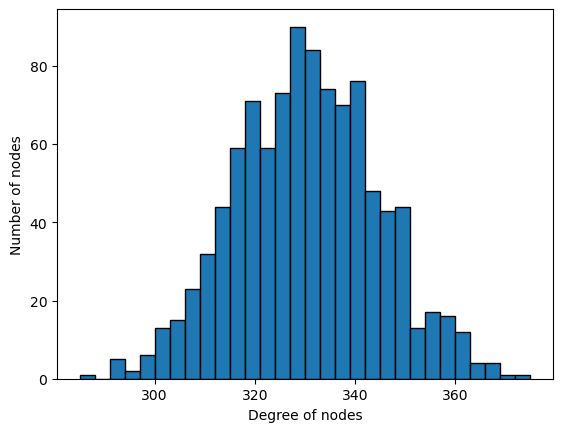

In [32]:
degreedist(test_G)

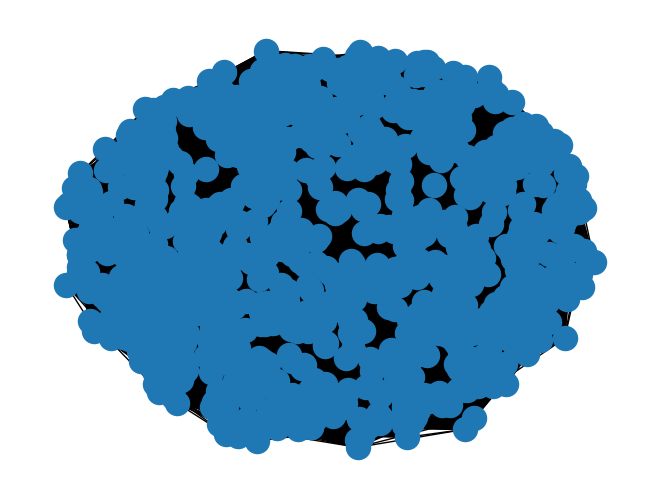

In [33]:
nx.draw(test_G)